# Google Image 기반 Yolov5 Custom Modeling
- Yolov5 받아오기
- Google Open Dataset 이미지 활용
- OIDv4_ToolKit 이용하여 Google Open Dataset 가져오기
- Annotation Label 정보를 Yolo 포맷에 맞게 변경하기
- Yolov5 학습
- Yolov5 이용하여 Object Detection 수행

# 1. Yolov5 받아오기

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 11142, done.
remote: Total 11142 (delta 0), reused 0 (delta 0), pack-reused 11142
Receiving objects: 100% (11142/11142), 11.14 MiB | 24.96 MiB/s, done.
Resolving deltas: 100% (7703/7703), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# 2. OIDv4_ToolKit 이용하여 Google Open Dataset 가져오기

In [2]:
# google open dataset에서 object 이름에 해당되는 이미지 다운로드해 주는 github 소스
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 30.09 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [3]:
%cd OIDv4_ToolKit

/content/yolov5/OIDv4_ToolKit


In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 8.6 MB 34.2 MB/s 
     |████████████████████████████████| 636 kB 42.6 MB/s 
     |████████████████████████████████| 547 kB 42.5 MB/s 
     |████████████████████████████████| 138 kB 45.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.8
    Uninstalling rsa-4.8:
      Successfully uninstalled rsa-4.8
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:
      Successfully uninstalled docutils-0.17.1
ERROR: pip's dependency resolver does not currently t

In [5]:
# 각 Object 이름별로 Train / Validatain / Test 이미지와 Label 다운로드 
# 아래 classes 옵션에 google open dataset에서 찾은 objet 이름에 공백 있으면 _ 로 해서 넣어줘라.
# limit 옵션: Train 다운로드할 이미지 갯수

!python3 main.py downloader --classes Bicycle Bicycle_helmet Stationary_bicycle --type_csv all --limit 1000 --multiclasses 1 -y


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Bicycle', 'Bicycle helmet', 'Stationary bicycle'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 51304 KB/s, 0 seconds pa

In [6]:
!pwd

/content/yolov5/OIDv4_ToolKit


### 받아온 이미지 데이터셋 : train, validaion , test 폴더

In [7]:
# Dataset 폴더 안에 train, validaion , test 폴더 보임
!ls -l /content/yolov5/OIDv4_ToolKit/OID/Dataset

total 12
drwxr-xr-x 3 root root 4096 Mar  1 04:27 test
drwxr-xr-x 3 root root 4096 Mar  1 04:27 train
drwxr-xr-x 3 root root 4096 Mar  1 04:27 validation


In [8]:
# Dataset/train 폴더 안에 이미지 다운로드할 Object이름 폴더 보임
!ls -l /content/yolov5/OIDv4_ToolKit/OID/Dataset/train

total 88
drwxr-xr-x 3 root root 86016 Mar  1 05:00 'Bicycle_Bicycle helmet_Stationary bicycle'


### Train 이미지와 Label 폴더

In [51]:
# Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/ 폴더 : 이미지와 Label 폴더 있음
!ls -l '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/' | head 

total 655372
-rw-r--r-- 1 root root  166154 Jul 10  2018 0006e2ef92e0ed4a.jpg
-rw-r--r-- 1 root root     268 Mar  1 05:15 0006e2ef92e0ed4a.txt
-rw-r--r-- 1 root root  212243 Jul 10  2018 00155f3b66b8cf27.jpg
-rw-r--r-- 1 root root     132 Mar  1 05:14 00155f3b66b8cf27.txt
-rw-r--r-- 1 root root  469633 Jul 10  2018 001b113b52697c49.jpg
-rw-r--r-- 1 root root     296 Mar  1 05:15 001b113b52697c49.txt
-rw-r--r-- 1 root root  560674 Jul 10  2018 002a5b2f3c8977f8.jpg
-rw-r--r-- 1 root root     394 Mar  1 05:15 002a5b2f3c8977f8.txt
-rw-r--r-- 1 root root  171696 Jul 10  2018 002e81410ab5f932.jpg


### Train Label 리스트

In [52]:
# Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label 폴더 :  Label 파일 있음
!ls -l '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label' | head 

total 7500
-rw-r--r-- 1 root root  192 Mar  1 05:44 0006e2ef92e0ed4a.txt
-rw-r--r-- 1 root root   74 Mar  1 05:44 00155f3b66b8cf27.txt
-rw-r--r-- 1 root root  194 Mar  1 05:44 001b113b52697c49.txt
-rw-r--r-- 1 root root  257 Mar  1 05:44 002a5b2f3c8977f8.txt
-rw-r--r-- 1 root root  125 Mar  1 05:44 002e81410ab5f932.txt
-rw-r--r-- 1 root root  137 Mar  1 05:44 00396a8814bde4d5.txt
-rw-r--r-- 1 root root   57 Mar  1 05:44 003a11e4e110e483.txt
-rw-r--r-- 1 root root  243 Mar  1 05:44 003b3f9a24b1ed58.txt
-rw-r--r-- 1 root root  104 Mar  1 05:44 003c8d783c546657.txt


### Train Label 읽어보기

In [11]:
# train 데이터셋의 label 파일 읽어보기 
!cat '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label/001b113b52697c49.txt'

Bicycle 280.96 459.895772 584.32 685.359276
Bicycle 725.76 334.35297 883.2 538.039404
Bicycle helmet 423.04 185.75164999999998 513.92 260.05231
Bicycle helmet 792.32 217.137522 832.64 260.05231


### Train Label 파일 내용 학인해 보니
- Bicycle helmet : 1개의 문자열 변경 필요
- Bicycle helmet : 1개 문자열 변경후 숫자 변경 필요
- 423.04 185.75164999999998 513.92 260.05231 : Yolov5 포맷으로 정규화 필요

# 3. Annotation Label 정보를 Yolo 포맷에 맞게 변경하기


### Label Class 이름에서 공백없애기


In [34]:
import os
os.getcwd()

'/content/yolov5/OIDv4_ToolKit'

In [48]:
# Label 파일 읽고 아래 문자열을 공백없는 문자열로 변경
# 'Bicycle helmet' --> 'Bicycle_helmet' 변경
# 'Stationary bicycle' --> 'Stationary_bicycle' 변경

import re
import glob

Train_path_txt = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label'
Valid_path_txt = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/validation/Bicycle_Bicycle helmet_Stationary bicycle/Label'
Test_path_txt = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/Label'

train_label = glob.glob(os.path.join(Train_path_txt, '*.txt'))
valid_label = glob.glob(os.path.join(Valid_path_txt, '*.txt'))
test_label = glob.glob(os.path.join(Test_path_txt, '*.txt')) 
label_list = [train_label, valid_label, test_label]

for label in label_list:
	for file_name in label:
		with open(file_name, 'r+') as f:
			text = f.read()
			text = re.sub('Bicycle helmet', 'Bicycle_helmet', text)
			text = re.sub('Stationary bicycle', 'Stationary_bicycle', text)
			f.seek(0)
			f.write(text)
			f.truncate()


### Label Class이름의 공백 제거 확인

In [49]:
# class 변환 위한 1단어로 변환 확인 : Bicycle helmet --> Bicycle_helmet
!cat '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/Label/001b113b52697c49.txt'

Bicycle 280.96 459.895772 584.32 685.359276
Bicycle 725.76 334.35297 883.2 538.039404
Bicycle_helmet 423.04 185.75164999999998 513.92 260.05231
Bicycle_helmet 792.32 217.137522 832.64 260.05231


### Label Class이름을 라벨인코딩 및 BBOX값을 정규화

In [54]:
# classes.txt 파일에서 class 내용 보기
# 우리가 원하는 Object 이름으로 변경해야 함 
# > Bicycle_helmet 
# > Bicycle
# > Stationary_bicycle

!cat classes.txt

Bicycle
Bicycle_helmet
Stationary_bicycle


In [63]:
# Object 이름 변경을 라벨인코딩시 참조 파일
# -->  Bicycle_helmet : 0,  Bicycle : 1, Stationary_bicycle : 2
# 그리고 순서를 Bicycle_helmet 을 Bicycle 앞쪽에 뒤어라
# 그렇지 않으면 라벨 인코딩시 0_helmet 으로 잘못 변환될수 있기에

with open('classes.txt','w') as f:
  f.write('Bicycle_helmet\n')
  f.write('Bicycle\n')
  f.write('Stationary_bicycle\n')

In [64]:
# class 이름 변경했는지 확인
!cat classes.txt

Bicycle_helmet
Bicycle
Stationary_bicycle


### Label 파일 읽고 라벨인코딩 및 BBOX 정규화 수행
- 수행 결과 : Label 파일이 이미지와 동일한 위치에 저장됨.

In [65]:
# 이미지와 annotation 같은 폴더에 넣어주고 Bbox 정규화
# Converting할때 나오는 class 이름은 OIDv4가 이미지 다운로드 받은 폴더 이름이다. 신경 안써도 된다.

!python  convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100% 1875/1875 [01:22<00:00, 22.68it/s]
Currently in subdirectory: validation
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100% 269/269 [00:08<00:00, 32.74it/s]
Currently in subdirectory: test
Converting annotations for class:  Bicycle_Bicycle helmet_Stationary bicycle
100% 782/782 [00:24<00:00, 32.35it/s]


In [66]:
# Object 이름이 라벨인코딩 되었고 
# BBox 값들이 정규화 되었다.

!cat '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/001b113b52697c49.txt'

1 0.4218359375 0.8336673061224491 0.29625000000000007 0.328664
1 0.784921875 0.6346253206997085 0.15375000000000005 0.29691899999999993
0 0.4570703125 0.324710860058309 0.08874999999999994 0.10830999999999999
0 0.79328125 0.34713924489795916 0.03937499999999994 0.06255799999999997


# OIDv4_ToolKit 구조 확인 

![OIDv4Toolkit](https://github.com/gzone2000/TEMP_TEST/raw/master/OIDv4_Toolkit.png)

# 4. AI 학습할수 있도록 학습 Data와 검증 Data 확인

### Train 이미지와 라벨이 같은 폴더 있음 

In [74]:
# Train 이미지와 Annotation Label 폴더
!ls -l '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/' | head

total 655368
-rw-r--r-- 1 root root  166154 Jul 10  2018 0006e2ef92e0ed4a.jpg
-rw-r--r-- 1 root root     268 Mar  1 05:58 0006e2ef92e0ed4a.txt
-rw-r--r-- 1 root root  212243 Jul 10  2018 00155f3b66b8cf27.jpg
-rw-r--r-- 1 root root     132 Mar  1 05:57 00155f3b66b8cf27.txt
-rw-r--r-- 1 root root  469633 Jul 10  2018 001b113b52697c49.jpg
-rw-r--r-- 1 root root     282 Mar  1 05:57 001b113b52697c49.txt
-rw-r--r-- 1 root root  560674 Jul 10  2018 002a5b2f3c8977f8.jpg
-rw-r--r-- 1 root root     359 Mar  1 05:58 002a5b2f3c8977f8.txt
-rw-r--r-- 1 root root  171696 Jul 10  2018 002e81410ab5f932.jpg


### Train / Validation / Test 이미지 리스트 확인

In [78]:
# train 이미지와 텍스트 확인
Train_Path = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/'

train_images = glob.glob(os.path.join(Train_Path, '*.jpg'))
train_text = glob.glob(os.path.join(Train_Path, '*.txt'))

print(f'Train : image의 갯수 {len(train_images)}, label파일의 갯수 {len(train_text)}')

Train : image의 갯수 1875, label파일의 갯수 1875


In [80]:
# validation 이미지와 텍스트 확인
Validation_Path = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/validation/Bicycle_Bicycle helmet_Stationary bicycle/'

validation_images = glob.glob(os.path.join(Validation_Path, '*.jpg'))
validation_text = glob.glob(os.path.join(Validation_Path, '*.txt'))

print(f'Validation : image의 갯수 {len(validation_images)}, label파일의 갯수 {len(validation_text)}')

Validation : image의 갯수 269, label파일의 갯수 269


In [81]:
# test 이미지와 텍스트 확인
Test_Path = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/'

test_images = glob.glob(os.path.join(Test_Path, '*.jpg'))
test_text = glob.glob(os.path.join(Test_Path, '*.txt'))

print(f'Test : image의 갯수 {len(test_images)}, label파일의 갯수 {len(test_text)}')

Test : image의 갯수 782, label파일의 갯수 782


In [82]:
%cd /content/yolov5/OIDv4_ToolKit

/content/yolov5/OIDv4_ToolKit


### Train / Validation / Test 이미지 리스트를 파일로 작성

In [84]:
# Train/Valid Text 작성 : 문자열을 숫자로 변경
with open('google_train.txt', 'w') as f:
	f.write('\n'.join(train_images) + '\n')

with open('google_valid.txt', 'w') as f:
	f.write('\n'.join(validation_images) + '\n')

with open('google_test.txt', 'w') as f:
	f.write('\n'.join(test_images) + '\n')

In [86]:
!ls -l google_*

-rw-r--r-- 1 root root  86020 Mar  1 06:21 google_test.txt
-rw-r--r-- 1 root root 208125 Mar  1 06:21 google_train.txt
-rw-r--r-- 1 root root  31204 Mar  1 06:21 google_valid.txt


In [87]:
!cat google_train.txt | head 

/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/66178d13f852856c.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/fbe9e93b1edcbace.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/00a42c0ee443a2b5.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/51712bca60fb90e4.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/3c0ad39e0d1bf428.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/a392e58199e1c98a.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/ae1ce8d80a0bb5de.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/02226c4bead28220.jpg
/content/yolov5/OIDv4_ToolKit/OID/Dataset/train/Bicycle_Bicycle helmet_Stationary bicycle/12b0fe3a940944a5.jpg
/

### 클래스 이름, 클래스 갯수, Train/Test 폴더 위치 있는 YAML 파일 작성

In [94]:
import yaml

data ={}

data['names'] = [ 'Bicycle helmet', 'Bicycle', 'Stationary bicycle' ] 
data['train'] = '/content/yolov5/OIDv4_ToolKit/google_train.txt'
data['val'] = '/content/yolov5/OIDv4_ToolKit/google_valid.txt'
data['nc'] = 3

with open('google_data.yaml', 'w') as f:
	yaml.dump(data, f)

print(data)

{'names': ['Bicycle helmet', 'Bicycle', 'Stationary bicycle'], 'train': '/content/yolov5/OIDv4_ToolKit/google_train.txt', 'val': '/content/yolov5/OIDv4_ToolKit/google_valid.txt', 'nc': 3}


# 5. Yolov5 학습

In [97]:
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 5 --data /content/yolov5/OIDv4_ToolKit/google_data.yaml --weights yolov5s.pt --cfg ./models/yolov5s.yaml --name google_teest


/content/yolov5
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/yolov5/OIDv4_ToolKit/google_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=google_teest, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: requests>=2.23.0 not found and is required by YOLOv5, attempting auto-update...
ERROR: 

In [98]:
# Yolov5 학습된 가중치 
!ls -l runs/train/google_teest/weights/best.pt

-rw-r--r-- 1 root root 14313653 Mar  1 07:03 runs/train/google_teest/weights/best.pt


# 6. YOLOv5 이용한 Object Detection
- https://github.com/ultralytics/yolov5 > Inference with detect.py > 코드 복사

In [99]:
# 테스트 이미지 가져와 Object Detection 잘되는지 확인

from IPython.display import Image
import os

# TEST 이미지 폴더 입력
Test_Image_Folder = '/content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/'

In [100]:
# Yolov5 학습 결과 weight 패스 복사 : runs/train/google_teest/weights/best.pt
# Test 이미지 폴더내의 이미지들에 대해 Object Detection 수행

%cd /content/yolov5
!python detect.py --source '{Test_Image_Folder}' --img 416 --conf 0.5 --weights /content/yolov5/runs/train/google_teest/weights/best.pt


/content/yolov5
detect: weights=['/content/yolov5/runs/train/google_teest/weights/best.pt'], source=/content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/782 /content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Stationary bicycle/001d1da154d00e83.jpg: 384x416 1 Bicycle helmet, 1 Bicycle, Done. (0.027s)
image 2/782 /content/yolov5/OIDv4_ToolKit/OID/Dataset/test/Bicycle_Bicycle helmet_Station

In [102]:
# Test 이미지 폴더에 대한 Object Detection 결과 저장 
!ls -l runs/detect/exp | head

total 217648
-rw-r--r-- 1 root root 155497 Mar  1 07:07 001d1da154d00e83.jpg
-rw-r--r-- 1 root root 235782 Mar  1 07:07 003c2b6816ba9d22.jpg
-rw-r--r-- 1 root root 174558 Mar  1 07:07 00733b95ebfa566a.jpg
-rw-r--r-- 1 root root 188423 Mar  1 07:07 00ca18f0b632408b.jpg
-rw-r--r-- 1 root root 428980 Mar  1 07:07 00ff4086155934c3.jpg
-rw-r--r-- 1 root root 285067 Mar  1 07:07 0134e4c71ff2dd8a.jpg
-rw-r--r-- 1 root root 122000 Mar  1 07:07 013fa6325ed13380.jpg
-rw-r--r-- 1 root root 222801 Mar  1 07:07 02211e9fd1fd1a0b.jpg
-rw-r--r-- 1 root root 348092 Mar  1 07:07 0238b08a9e909615.jpg


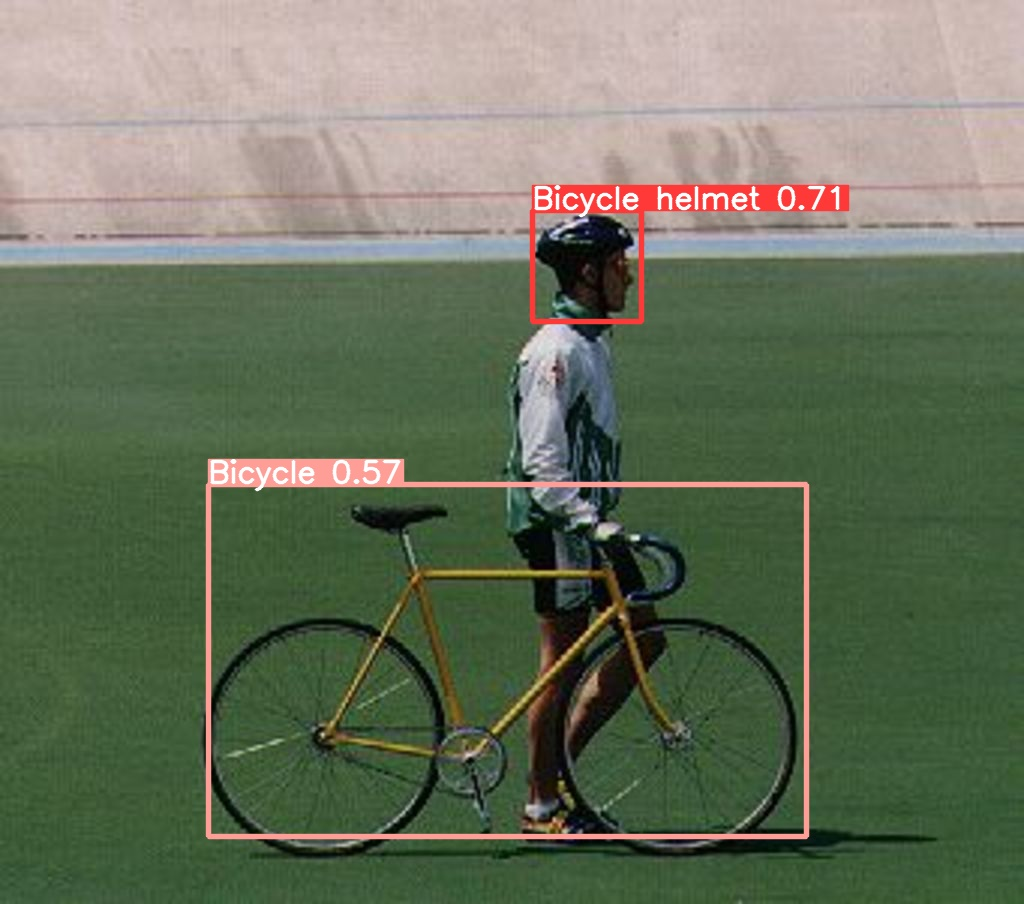

In [104]:
Image(f'/content/yolov5/runs/detect/exp/' + '001d1da154d00e83.jpg')

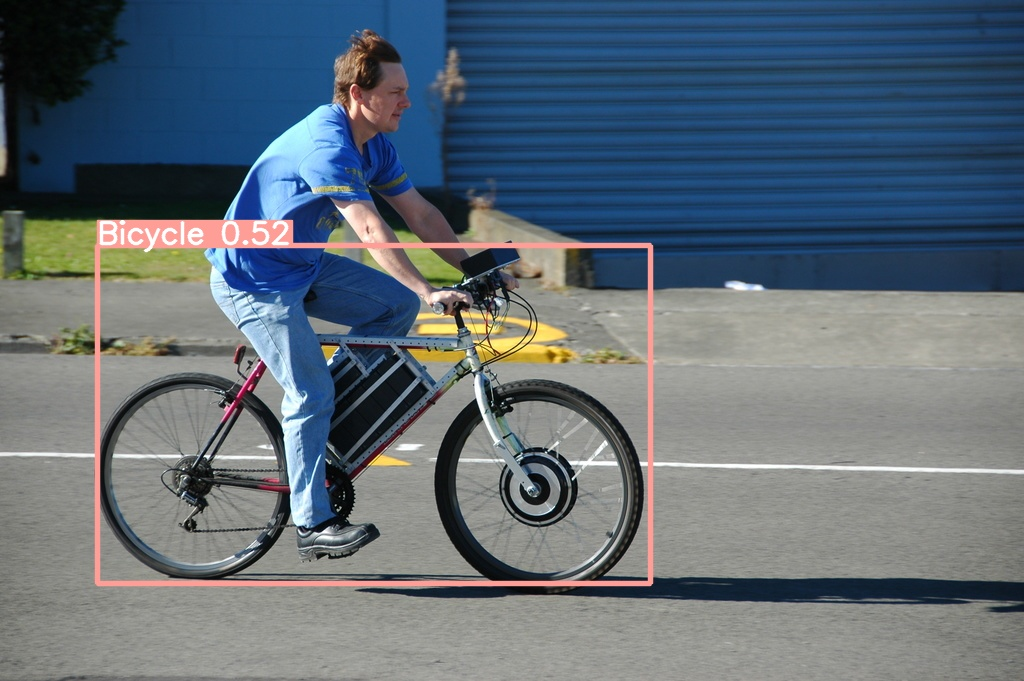

In [107]:
Image(f'/content/yolov5/runs/detect/exp/' + '02211e9fd1fd1a0b.jpg')